In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger

# OCR Only

In [2]:
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_only_ch7.csv"

# Read the CSV file
df_standard_ocr_only = pd.read_csv(filename)
print(df_standard_ocr_only)

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment
                                               Prompt  GT_Keyframe  Top_1  \
0                                  What are feedlots?           47     47   
1                                 What is weathering?           17     19   
2   What is desertification and how much productiv...           22     22   
3   What is the conservation reserve programm of 1...           29     31   
4           GM crops today are engineered to resist:            56     56   
5   90% of energy is lost from one trophic level t...           45     45   
6                                Risks of biocontrol?           40     40   
7   As the populations increases pesticides lose t...           38     39   
8   Substainable fertilizer use involves monitorin...           36     36   
9                                What is overgrazing?           29     21   
10                   Why does the USDA issues labels?           71     63   
11   

In [3]:
def calculate_and_plot_gt_keyframe_percentage(data):
    # Convert data to a DataFrame
    df = pd.DataFrame(data)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    total = len(df)
    top_1_count = 0
    top_2_count = 0
    top_3_count = 0
    
    # Iterate through the DataFrame to count the occurrences
    for index, row in df.iterrows():
        if row['GT_Keyframe'] == row['Top_1']:
            top_1_count += 1
        elif row['GT_Keyframe'] == row['Top_2']:
            top_2_count += 1
        elif row['GT_Keyframe'] == row['Top_3']:
            top_3_count += 1
    
    # Calculate percentages
    top_1_percentage = (top_1_count / total) * 100
    top_2_percentage = (top_2_count / total) * 100
    top_3_percentage = (top_3_count / total) * 100
    
    # Print the results
    print(f"GT_Keyframe in Top 1: {top_1_percentage:.2f}%")
    print(f"GT_Keyframe in Top 2: {top_2_percentage:.2f}%")
    print(f"GT_Keyframe in Top 3: {top_3_percentage:.2f}%")
    
    # Data for plotting
    labels = ['Top 1', 'Top 2', 'Top 3']
    percentages = [top_1_percentage, top_2_percentage, top_3_percentage]
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['blue', 'green', 'red'])
    plt.xlabel('Position')
    plt.ylabel('Percentage')
    plt.title('Percentage of GT_Keyframe in Top Positions \n (OCR Only)')
    plt.ylim(0, 100)

img_paths = 150

def check_proximity_keyframes(gt):
    proximity_kf = []

    # Define the boundaries for the image paths
    max_index = img_paths - 1

    if gt == 0:
        logger.info("No proximity - Invalid GT")
    elif gt == 1:
        proximity_kf.extend(range(1, 5))
    elif gt >= max_index:
        proximity_kf.extend(range(max_index, max_index - 5, -1))
    else:
        proximity_kf.extend([gt - 2, gt - 1, gt, gt + 1, gt + 2])

    # Ensure all indexes are within valid range
    proximity_kf = [i for i in proximity_kf if 0 <= i <= max_index]

    return proximity_kf


GT_Keyframe in Top 1: 57.14%
GT_Keyframe in Top 2: 9.52%
GT_Keyframe in Top 3: 9.52%


<Figure size 1000x600 with 0 Axes>

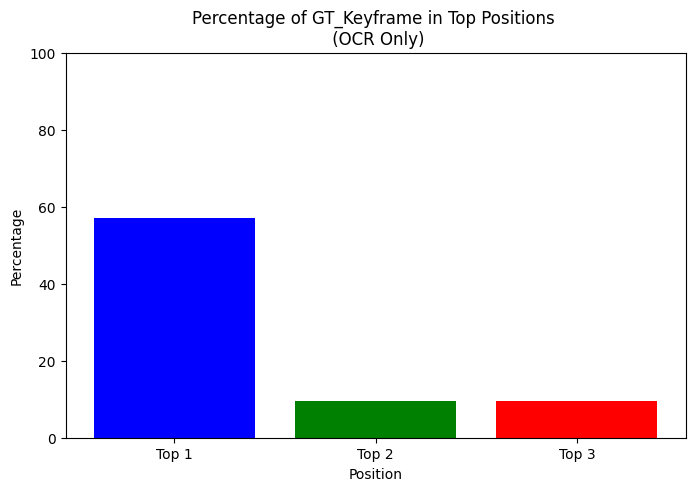

In [4]:
# call
calculate_and_plot_gt_keyframe_percentage(df_standard_ocr_only)

In [5]:
# iterate through data frame 
df = df_standard_ocr_only
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - What are feedlots?
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - What is weathering?
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - What is the conservation reserve programm of 1985?
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - GM crops today are engineered to resist: 
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - 90% of energy is lost from one trophic level to the next
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - Risks of biocontrol?
2024-07-13 13:22:41.674 | INFO     | __main__:<module>:5 - As the populations increases pesticides lose their effectiveness
2024-07-13 13:22:41.690 | INFO     | __main__:<module>:5 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-13 13:22:41.690 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


# OCR LAVA

In [6]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_lava_ch7.csv"
df_ocr_lava = pd.read_csv(filename)
df_ocr_lava.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,54,48
1,What is weathering?,17,19,26,23
2,What is desertification and how much productiv...,22,22,20,32
3,What is the conservation reserve programm of 1...,29,31,24,27
4,GM crops today are engineered to resist:,56,56,11,60


GT_Keyframe in Top 1: 52.38%
GT_Keyframe in Top 2: 14.29%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

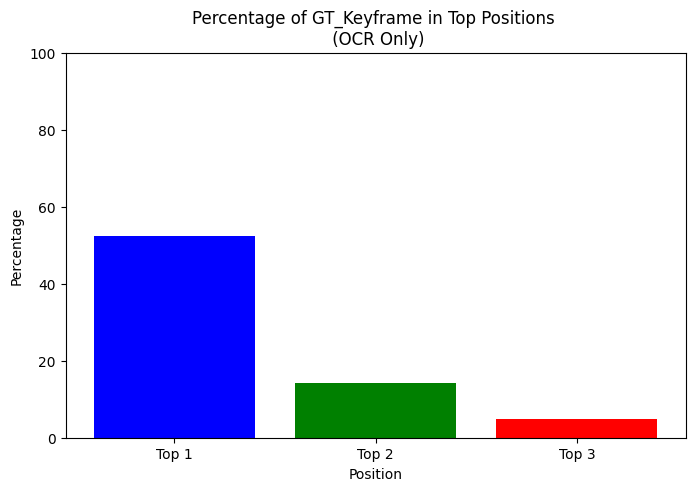

In [7]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_lava)

In [8]:
# iterate through data frame 
df = df_ocr_lava
# iterate through data frame 
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - What are feedlots?
2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - What is weathering?
2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - What is the conservation reserve programm of 1985?
2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - GM crops today are engineered to resist: 
2024-07-13 13:22:42.091 | INFO     | __main__:<module>:6 - 90% of energy is lost from one trophic level to the next
2024-07-13 13:22:42.106 | INFO     | __main__:<module>:6 - Risks of biocontrol?
2024-07-13 13:22:42.109 | INFO     | __main__:<module>:6 - As the populations increases pesticides lose their effectiveness
2024-07-13 13:22:42.109 | INFO     | __main__:<module>:6 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-13 13:22:42.109 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


# LLM Long Summary

In [9]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_llm_long_summary_ch7.csv"
df_long_summary = pd.read_csv(filename)
df_long_summary.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,48,54
1,What is weathering?,17,27,26,23
2,What is desertification and how much productiv...,22,22,29,21
3,What is the conservation reserve programm of 1...,29,31,24,72
4,GM crops today are engineered to resist:,56,56,11,58


GT_Keyframe in Top 1: 71.43%
GT_Keyframe in Top 2: 4.76%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

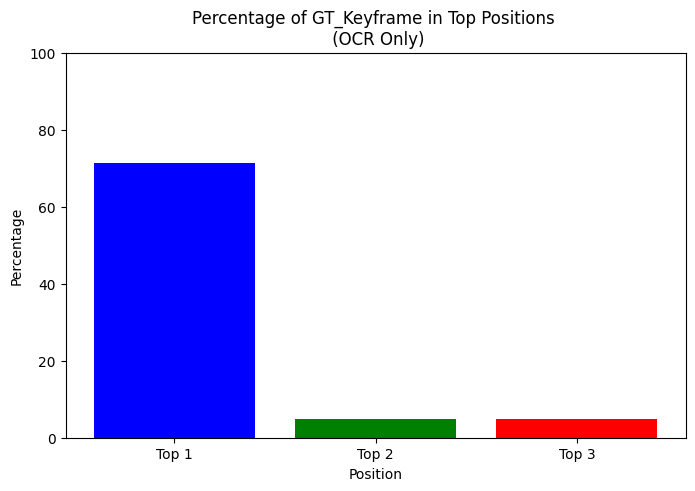

In [10]:
# call
calculate_and_plot_gt_keyframe_percentage(df_long_summary)

In [11]:
# iterate through data frame 
df = df_long_summary
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-13 13:22:42.373 | INFO     | __main__:<module>:5 - What are feedlots?
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - What is weathering?
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - What is the conservation reserve programm of 1985?
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - GM crops today are engineered to resist: 
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - 90% of energy is lost from one trophic level to the next
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - Risks of biocontrol?
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - As the populations increases pesticides lose their effectiveness
2024-07-13 13:22:42.376 | INFO     | __main__:<module>:5 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-13 13:22:42.376 | INFO     | __

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]


# OCR TRANSCRIPTIONS 

In [12]:
filename = notebook_path / "notebooks/new_data/df_standard_df_ocr_transcriptions_ch7.csv"

df_ocr_transcriptions = pd.read_csv(filename)
df_ocr_transcriptions.head()

,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,48,17
1,What is weathering?,17,19,27,21
2,What is desertification and how much productiv...,22,22,21,20
3,What is the conservation reserve programm of 1...,29,31,24,26
4,GM crops today are engineered to resist:,56,56,11,60


GT_Keyframe in Top 1: 66.67%
GT_Keyframe in Top 2: 9.52%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

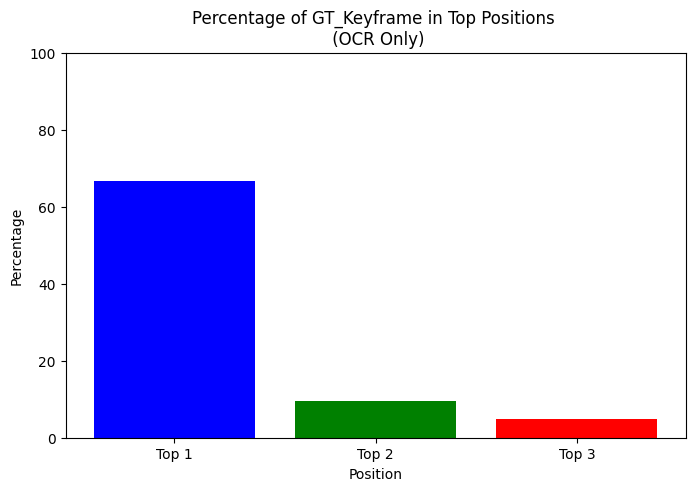

In [13]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_transcriptions)

In [14]:
df = df_ocr_transcriptions
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - What are feedlots?
2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - What is weathering?
2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - What is the conservation reserve programm of 1985?
2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - GM crops today are engineered to resist: 
2024-07-13 13:22:42.794 | INFO     | __main__:<module>:4 - 90% of energy is lost from one trophic level to the next
2024-07-13 13:22:42.810 | INFO     | __main__:<module>:4 - Risks of biocontrol?
2024-07-13 13:22:42.810 | INFO     | __main__:<module>:4 - As the populations increases pesticides lose their effectiveness
2024-07-13 13:22:42.810 | INFO     | __main__:<module>:4 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-13 13:22:42.815 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
